<a href="https://colab.research.google.com/github/chanyoung1998/LearningML-DL/blob/main/8%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#합성곱 신경망을 사용한 이미지 분류

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled,val_scaled, train_target,val_target = train_test_split(train_scaled,train_target,test_size = 0.2,random_state = 42)


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

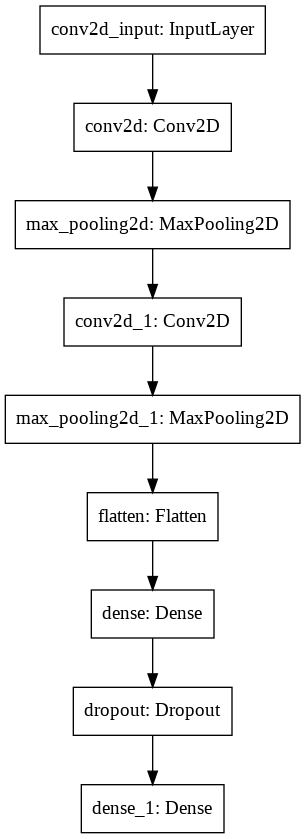

In [ ]:
keras.utils.plot_model(model)

In [ ]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 40s 7ms/step - loss: 0.7170 - accuracy: 0.7434 - val_loss: 0.3173 - val_accuracy: 0.8839
Epoch 2/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3457 - accuracy: 0.8763 - val_loss: 0.2644 - val_accuracy: 0.9023
Epoch 3/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2879 - accuracy: 0.8937 - val_loss: 0.2463 - val_accuracy: 0.9107
Epoch 4/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2527 - accuracy: 0.9071 - val_loss: 0.2400 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2285 - accuracy: 0.9151 - val_loss: 0.2261 - val_accuracy: 0.9162
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2099 - accuracy: 0.9222 - val_loss: 0.2237 - val_accuracy: 0.9188
Epoch 7/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1924 - accuracy: 0.9300 - val_loss: 0.2294 - val_ac

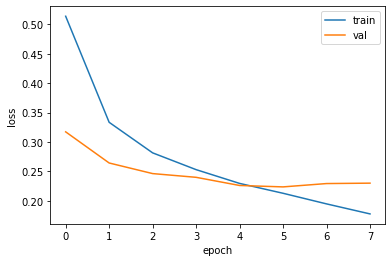

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2237 - accuracy: 0.9188


[0.22371508181095123, 0.918833315372467]

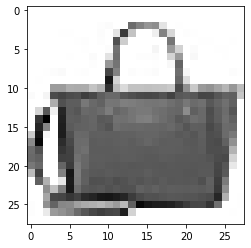

In [9]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [10]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.2295067e-12 1.0768770e-17 1.9641064e-15 6.2278755e-14 2.8073979e-13
  7.7198657e-14 8.9392279e-14 6.2516458e-13 1.0000000e+00 4.8753661e-13]]


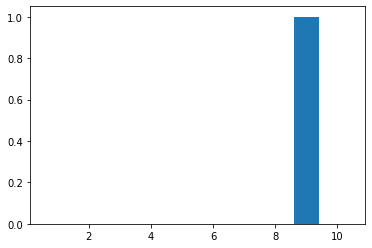

In [11]:
plt.bar(range(1,11),preds[0])
plt.show()


In [12]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9114


[0.24476076662540436, 0.9114000201225281]

#합성곱 신경망의 시각화

In [13]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')


In [14]:
model.layers

In [26]:
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [28]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())
print(conv_weights.shape)

-0.043936074 0.2805582
(3, 3, 1, 32)


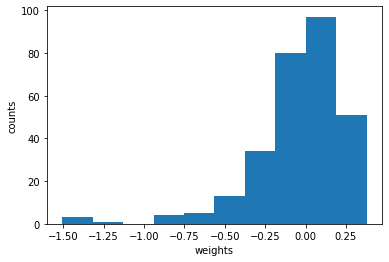

In [17]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

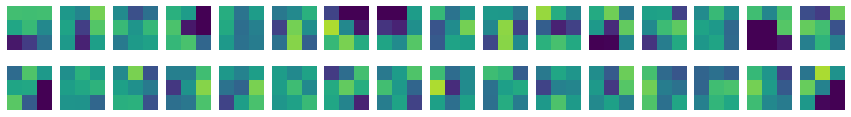

In [30]:
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j],vmin = -0.5,vmax =0.5)
    axs[i,j].axis('off')
plt.show()

In [33]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding = 'same',input_shape=(28,28,1)))

In [34]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [35]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

-0.002170633 0.079658106


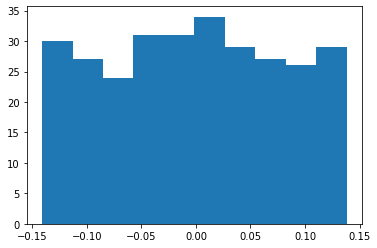

In [36]:
plt.hist(no_training_weights.reshape(-1,1))
plt.show()

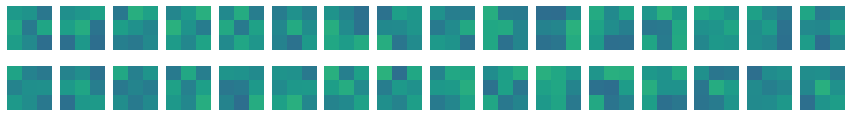

In [37]:
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j],vmin = -0.5,vmax =0.5)
    axs[i,j].axis('off')
plt.show()

In [38]:
inputs = keras.Input(shape=(784,))
print(model.input)
conv_acti = keras.models.Model(model.input,model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


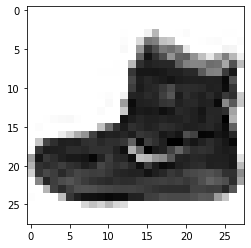

In [39]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap = 'gray_r')
plt.show()

In [40]:
inputs = train_input[0:1].reshape(-1,28,28,1)/ 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


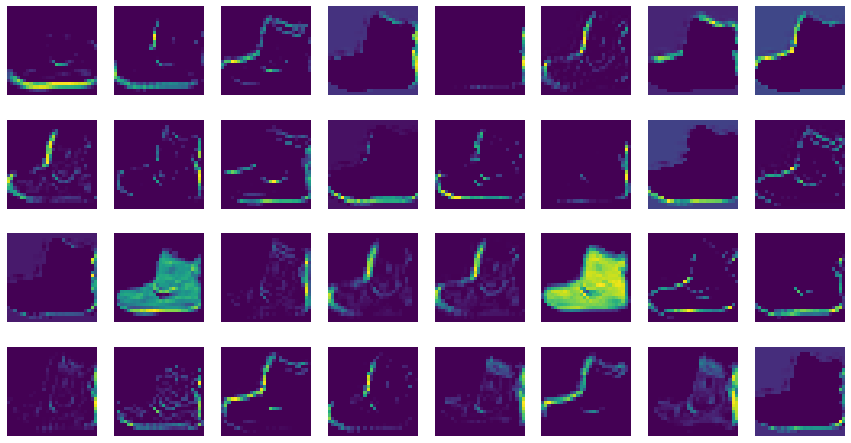

In [44]:
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()